In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

Flow Free Solver
Run loaded puzzle: (y/n): y
[1, 4, 3, 3]
[2, 2, 4, 3]
[0, 4, 4, 2]
Genetic Algorthm
0 [[0, 4, 0, 3, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 3, 1, 4, 1, 4, 0, 4, 2], [2, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 3, 4, 3], [1, 4, 1, 3, 2, 3, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3]]
1 [[0, 4, 0, 3, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 4, 2], [2, 2, 3, 2, 3, 1, 4, 1, 4, 0, 3, 0, 2, 0, 4, 3], [1, 4, 1, 3, 2, 3, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3]]
2 [[0, 4, 0, 3, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 3, 0, 3, 1, 3, 2, 4, 2], [2, 2, 1, 2, 1, 3, 2, 3, 2, 4, 3, 4, 4, 4, 4, 3], [1, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3]]
3 [[0, 4, 0, 3, 0, 2, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2], [2, 2, 1, 2, 1, 1, 2, 1, 3, 1, 4, 3], [1, 4, 2, 4, 2, 3, 3, 3]]
4 [[0, 4, 0, 3, 0, 2, 0, 1, 1

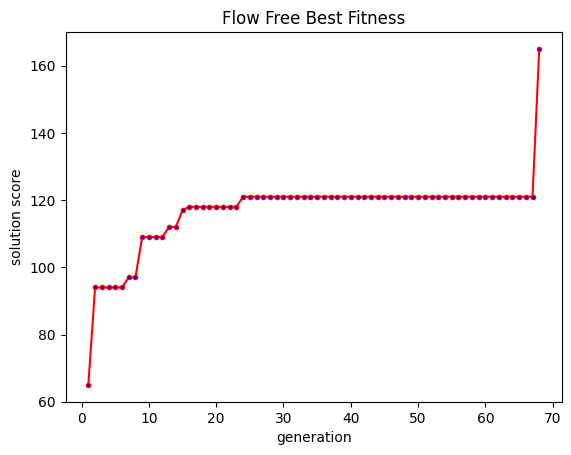

end


In [ ]:
# Flow free solver
# Uses paths as solution

import numpy as np
import random
import copy
import matplotlib.pyplot as plt
from operator import add

LEFT = [-1, 0] # left
RIGHT = [1, 0] # right
UP = [0, 1] # up
DOWN = [0, -1] # down
NON = [0, 0] # none
debug = False


def printPuzzle(puzzle):
    puzzle_h = len(puzzle)
    for row in range(puzzle_h):
        print(puzzle[puzzle_h-(row+1)])


def randPathLen():
    # Generate normally distributed path lengths between 3 and max
    maxlen = int(((puzzle_width * puzzle_height) / puzzle_colors * 3))
    rng = np.random.default_rng()
    path_len = rng.integers(3, maxlen, size=puzzle_colors)
    return path_len


print("Flow Free Solver")
print("==============================")

debug_bool = input("Run loaded puzzle: (y/n): ")
if debug_bool == 'y': debug = True
else: debug = False

debug_paths = []

if debug == False:
    while True:
        puzzle_width = int(input("Puzzle Width (5-15): "))
        if 5 <= puzzle_width <= 15: break
        else: print("Invalid selection")
    while True:
        puzzle_height = int(input("Puzzle Height (5-15): "))
        if 5 <= puzzle_height <= 15: break
        else: print("Invalid selection")
    while True:
        puzzle_colors = int(input("Puzzle Colors (3-16): "))
        if 3 <= puzzle_colors <= 16: break
        else: print("Invalid selection")

    path_lengths = randPathLen()
    puzzle_paths = []

    # Tell the user the possible range
    available_range = (puzzle_width-1,puzzle_height-1)
    print("Available range is (0, 0) to", available_range)
    print("Bottom left is (0, 0).")

    # Color coordinates input from user
    for num in range(puzzle_colors):
        x_str = "Color " + str(num+1) + "'s start x-position: "
        x_pos = int(input(x_str))
        y_str = "Color " + str(num+1) + "'s start y-position: "
        y_pos = int(input(y_str))
        tup1 = (x_pos, y_pos)

        x_str2 = "Color " + str(num+1) + "'s end x-position: "
        x_pos2 = int(input(x_str2))
        y_str2 = "Color " + str(num+1) + "'s end y-position: "
        y_pos2 = int(input(y_str2))
        tup2 = (x_pos2, y_pos2)

        color_arr = [x_pos, y_pos, x_pos2, y_pos2]
        tup_arr = [tup1, tup2]
        puzzle_paths.append(color_arr.copy())
        debug_paths.append(copy.deepcopy(tup_arr))
    format_user_input = [[puzzle_width,puzzle_height],copy.deepcopy(debug_paths)]
    print(format_user_input)
else:
    cords = [[5, 5], [[(0, 4), (4, 2)], [(2, 2), (4, 3)], [(1, 4), (3, 3)]] #5x5TestLevel
            ]#puzzle size, color points
            #
            #[5, 5], [[(0, 0), (4, 0)], [(0, 1), (4, 1)], [(0, 2), (4, 2)], [(0, 3), (4, 3)], [(0, 4), (4, 4)]] #5x5StraightAcross
            #[6, 6], [[(0, 0), (5, 3)], [(0, 1), (1, 4)], [(1, 1), (4, 1)], [(0, 4), (1, 2)], [(4, 2), (4, 5)], [(4, 3), (5, 5)]] #6x6ManiaLv121
            #[6, 6], [[(4, 3), (4, 5)], [(0, 3), (5, 0)], [(2, 4), (5, 1)], [(0, 4), (5, 5)], [(1, 1), (1, 4)]] #6x6ManiaLv61
            #[6, 6], [[(3, 2), (4, 5)], [(5, 2), (5, 5)], [(0, 0), (5, 0)], [(4, 0), (2, 4)]] #6x6ManiaLv62
            #[6, 6], [[(2, 2), (3, 5)], [(0, 5), (4, 5)], [(1, 4), (5, 5)]] #6x6ManiaLv71
            #[6, 6], [[(0, 0), (5, 4)], [(5, 0), (2, 3)], [(4, 0), (4, 3)], [(3, 3), (5, 3)]] #6x6ManiaLv82
            #[7, 7], [[(0, 0), (6, 6)], [(0, 1), (2, 4)], [(0, 3), (4, 5)], [(0, 5), (4, 6)], [(1, 1), (4, 4)], [(4, 0), (5, 2)], [(6, 0), (6, 5)]] #7x7ManiaLv6
            #[7, 7], [[(0, 4), (4, 3)], [(0, 2), (4, 2)], [(0, 6), (6, 6)], [(0, 1), (2, 5)], [(0, 5), (3, 4)], [(0, 0), (5, 5)]] #7x7ManiaLv14
            #[7, 7], [[(3, 6), (5, 6)], [(5, 5), (6, 6)], [(0, 4), (2, 0)], [(0, 6), (4, 0)], [(3, 0), (4, 1)], [(1, 2), (2, 1)], [(3, 5), (6, 4)], [(0, 5), (5, 1)]] #7x7ManiaLv18
            #[8, 8], [[(0, 7), (5, 4)], [(1, 1), (1, 6)], [(1, 7), (7, 2)], [(3, 5), (5, 5)], [(4, 4), (7, 0)], [(3, 0), (6, 0)], [(4, 3), (5, 2)], [(5, 3), (6, 2)]] #8x8ManiaLv91
            #[8, 8], [[(0, 6), (2, 5)], [(0, 5), (5, 4)], [(3, 3), (6, 6)], [(1, 5), (4, 4)], [(3, 6), (5, 6)], [(0, 2), (6, 4)], [(0, 7), (7, 0)]] #8x8ManiaLv6
            #[10, 10], [[(4, 3), (6, 4)], [(0, 5), (4, 9)], [(2, 6), (9, 8)], [(4, 5), (7, 7)], [(6, 8), (9, 7)], [(1, 6), (2, 8)], [(2, 1), (6, 3)], [(4, 0), (8, 4)], [(2, 4), (9, 6)], [(8, 0), (6, 5)], [(0, 0), (3, 6)]] #10x10ManiaLv72
            #[11, 11], [[(3, 6), (3, 8)], [(0, 0), (10, 10)], [(1, 0), (3, 7)], [(4, 3), (6, 7)], [(4, 6), (10, 6)], [(5, 3), (9, 8)], [(5, 9), (9, 9)], [(7, 3), (10, 9)], [(8, 1), (9, 6)], [(4, 4), (8, 6)]] #11x11ManiaLv1
    puzzle_width = cords[0][0]
    puzzle_height = cords[0][1]
    puzzle_colors = len(cords[1])
    path_lengths = randPathLen()
    puzzle_paths = []
    for i in range(puzzle_colors):
        color_arr = [cords[1][i][0][0], cords[1][i][0][1], cords[1][i][1][0], cords[1][i][1][1]]
        puzzle_paths.append(color_arr.copy())

#print(puzzle_paths)
printPuzzle(puzzle_paths)
puzzle_points = copy.deepcopy(puzzle_paths)
#-------------------------------------------------------------------------------
# Genetic Algorithm
print("Genetic Algorthm")
population_size = 200
generations = 200
mutation_rate = 1.0
top_solutions_advancing = 40
random_solutions_advancing = 40
solutions_advancing = top_solutions_advancing + random_solutions_advancing

cell_fill_bonus = 1
grid_fill_bonus = 20#int((puzzle_height*puzzle_width)*0.75)
path_comp_bonus = 40
overlap_penalty = 6
bundled_penalty = 20
max_possible_score = cell_fill_bonus * (puzzle_width * puzzle_height) + grid_fill_bonus + path_comp_bonus * puzzle_colors

def fitness_function(solution):
    grid = paths_to_grid(solution)
    #printPuzzle(grid)
    score = 0
    for score_y in range(puzzle_height):
        for score_x in range(puzzle_width):
            if grid[score_y][score_x] != 0:
                score += cell_fill_bonus #point for each space filled
    if score == puzzle_height*puzzle_width:
        score += grid_fill_bonus #bonus points for all spaces filled
    for fit_color in range(puzzle_colors):
        color_length = len(solution[fit_color])
        a1 = solution[fit_color][color_length-4:color_length-2]
        a2 = solution[fit_color][color_length-2:color_length]

        if list(map(add, a1, LEFT)) == a2: #bonus points for complete paths
            score += path_comp_bonus
        elif list(map(add, a1, RIGHT)) == a2:
            score += path_comp_bonus
        elif list(map(add, a1, UP)) == a2:
            score += path_comp_bonus
        elif list(map(add, a1, DOWN)) == a2:
            score += path_comp_bonus

        for fit_path in range(0, color_length, 2):
            check_coord = solution[fit_color][fit_path:fit_path+2] #pick point to compare
            for check_color in range(puzzle_colors):
                if fit_color != check_color:
                    for check_path in range(0, len(solution[check_color]), 2):
                        if check_coord == solution[check_color][check_path:check_path+2]: #compare point to all others
                            score -= overlap_penalty #deduct points for overlapping paths
    #if empty spaces closer to outside penalize more points
    for row in range(puzzle_height):
        for col in range(puzzle_width):
            if grid[row][col] == 0:
                score -= rev_map[row][col] #penalize based on dist from middle
    #if 4 numbers(bundle) in a 2x2 square are the same penalize
    for bundle_y in range(puzzle_height-1):
        for bundle_x in range(puzzle_width-1):
            if grid[bundle_y][bundle_x] == grid[bundle_y][bundle_x+1] and (grid[bundle_y][bundle_x] != 0 or grid[bundle_y][bundle_x+1] != 0):
                if grid[bundle_y][bundle_x:bundle_x+2] == grid[bundle_y+1][bundle_x:bundle_x+2]:
                    score -= bundled_penalty
    return score


def make_rev_map(height, width): #fills decreasing in layers
    array = [[0] * width for _ in range(height)]
    top_row = 0
    bottom_row = height - 1
    left_col = 0
    right_col = width - 1
    num = max(height, width)

    while top_row <= bottom_row and left_col <= right_col:
        # Fill top row
        for i in range(left_col, right_col + 1): array[top_row][i] = num
        top_row += 1

        # Fill right column
        for i in range(top_row, bottom_row + 1): array[i][right_col] = num
        right_col -= 1

        if top_row <= bottom_row: # Fill bottom row
            for i in range(right_col, left_col - 1, -1): array[bottom_row][i] = num
            bottom_row -= 1

        if left_col <= right_col: # Fill left column
            for i in range(bottom_row, top_row - 1, -1): array[i][left_col] = num
            left_col += 1

        num =int( num / 2)
    return array


def paths_to_grid(member_path):
    member_grid = [[0 for new_row in range(puzzle_width)] for new_col in range(puzzle_height)]
    for grid_row in range(puzzle_colors):
        for grid_col in range(0, len(member_path[grid_row])-1, 2):
            x1 = member_path[grid_row][grid_col]
            y1 = member_path[grid_row][grid_col+1]
            member_grid[y1][x1] = grid_row + 1
    return member_grid


def rand_direction(sel_direction):
    match sel_direction:
        case 0:
            ret_direction = LEFT
        case 1:
            ret_direction = RIGHT
        case 2:
            ret_direction = UP
        case 3:
            ret_direction = DOWN
        case default:
            ret_direction = NON
    return ret_direction


def rand_valid_direction(path):
    # need to make sure new coords are:
    #DONE 1. not outside the bounds of the puzzle
    #DONE 2. not equal to all color start/end points except the same path end
    #DONE 3. not equal to any previous positions in the color path

    # 3a?. if the next coord is equal to a previous part of the path, reset from there
    #4. If an adjacent cell is equal to the ending, break

    #create random list of directions ending with error bit
    random_direction = list(range(4))
    random.shuffle(random_direction)
    random_direction.append(-1)
    #print(random_direction)
    current_color = -1
    for color1 in range(puzzle_colors):
        if path[0:2] == puzzle_points[color1][0:2]:
            current_color = color1
            break
    #print(current_color)

    for r in range(len(random_direction)):
        new_direction = rand_direction(random_direction[r])
        new_x = path[len(path)-4] + new_direction[0]
        new_y = path[len(path)-3] + new_direction[1]
        new_coord = [new_x, new_y]

        if r == 4: # returns [0,0]
            return new_direction # maybe make return -1 as an error and stop generating

        elif 0 <= new_x <= puzzle_width-1 and 0 <= new_y <= puzzle_height-1:#1
            allclear=True
            for i in range(4): #4
                if (new_x + LEFT[0]) == path[len(path)-2:len(path)-1] and new_y == path[len(path)-1:len(path)]: return LEFT
                if (new_x + RIGHT[0]) == path[len(path)-2:len(path)-1] and new_y == path[len(path)-1:len(path)]: return RIGHT
                if new_x == path[len(path)-2:len(path)-1] and (new_y + UP[1]) == path[len(path)-1:len(path)]: return UP
                if new_x == path[len(path)-2:len(path)-1] and (new_y + DOWN[1]) == path[len(path)-1:len(path)]: return DOWN

            for color2 in range(puzzle_colors):#2
                if color2 != current_color:
                    if new_coord == puzzle_points[color2][0:2] or new_coord == puzzle_points[color2][2:4]:
                        allclear = False
                        break
                    elif new_coord == path[len(path)-2:len(path)]:
                        return new_direction
            #continue

            if allclear == True:#3
                if len(path) < 5:
                    return new_direction
                elif len(path) > 5:
                    repeat = False
                    for check_path in range(0, len(path), 2):
                        if new_coord == path[check_path:check_path + 2]:  # compare point to all others in same path
                            repeat = True
                    if repeat == False:
                        return new_direction


def create_member(paths):
    new_member = copy.deepcopy(paths)
    new_member_grid = paths_to_grid(new_member)
    member_path_lengths = randPathLen()
    #print(member_path_lengths)
    for c in range(puzzle_colors): # Create random color paths to connect start & end
        d = len(new_member[c])
        while len(new_member[c]) < (member_path_lengths[c] * 2): # Fill in paths to randomly generated len
            direction = rand_valid_direction(new_member[c]) #pick random direction for path \/
            #print(direction)
            new_member[c].insert((len(new_member[c])-2), direction[0]+new_member[c][d-4]) # next x-coord
            new_member[c].insert((len(new_member[c])-2), direction[1]+new_member[c][d-3]) # next y-coord
            #print(new_member)
            d += 2
            if new_member[c][d - 2] == new_member[c][d - 4]: # Check x to see if last generated point is end point
                if new_member[c][d - 1] == new_member[c][d - 3]: # Check y for ^^^
                    new_member[c].pop(len(new_member[c]) - 1) # Delete the end point if same
                    new_member[c].pop(len(new_member[c]) - 1) # ^
                    break
    return new_member


def create_population(pop_size):
    generation_array = []
    for a in range(pop_size): # Create new members up to pop_size
        new_mem = create_member(puzzle_paths)
        print(a, new_mem)
        generation_array.append(copy.deepcopy(new_mem))
    return generation_array


def random_mutation(mutate_population):
    mutated_solution = random.randint(1, population_size-1)
    #print(mutated_solution)
    #for i in range(2): mutate same solution multiple times
    mutated_color = random.randint(0, puzzle_colors-1)
    mutated_path = mutate_population[mutated_solution][mutated_color]
    #print(mutated_path)
    mutate_start = random.randint(1, int(len(mutated_path)/2)) * 2

    max2 = int((puzzle_width * puzzle_height) / puzzle_colors * 3)#+puzzle_width)
    rng = np.random.default_rng()
    mutated_path_len = rng.integers(3, max2)

    for m in reversed(range(mutate_start, len(mutated_path)-2)):
        #print(m)
        mutated_path.pop(m)
    d = len(mutated_path)
    while len(mutated_path) < (mutated_path_len * 2):  # Fill in paths to randomly generated len, path_length[c]
        direction = rand_valid_direction(mutated_path)  # pick random direction for path \/
        mutated_path.insert((len(mutated_path) - 2), direction[0] + mutated_path[d - 4])  # next x-coord
        mutated_path.insert((len(mutated_path) - 2), direction[1] + mutated_path[d - 3])  # next y-coord
        d += 2
        if mutated_path[d - 2] == mutated_path[d - 4]:  # Check x to see if the last generated point is end point
            if mutated_path[d - 1] == mutated_path[d - 3]:  # Check y for ^^^
                mutated_path.pop(len(mutated_path) - 1)  # Delete the end point if same
                mutated_path.pop(len(mutated_path) - 1)  # ^
                break
    #print(mutated_path)


def edgefind_mutation(mutate_population):
    mutated_solution = random.randint(1, population_size-1)
    #print(mutate)
    mutated_color = random.randint(0, puzzle_colors-1)
    mutated_path = mutate_population[mutated_solution][mutated_color]
    #print(mutated_path)
    mutate_start = random.randint(1, int(len(mutated_path)/2)) * 2

    max2 = int(((puzzle_width * puzzle_height) / puzzle_colors * 2))
    rng = np.random.default_rng()
    mutated_path_len = rng.integers(3, max2)

    for m in reversed(range(mutate_start, len(mutated_path)-2)):
        #print(m)
        mutated_path.pop(m)
    d = len(mutated_path)
    while len(mutated_path) < (mutated_path_len * 2):  # Fill in paths to randomly generated len, path_length[c]
        direction = rand_valid_direction(mutated_path)  # pick random direction for path \/
        mutated_path.insert((len(mutated_path) - 2), direction[0] + mutated_path[d - 4])  # next x-coord
        mutated_path.insert((len(mutated_path) - 2), direction[1] + mutated_path[d - 3])  # next y-coord
        d += 2
        if mutated_path[d - 2] == mutated_path[d - 4]:  # Check x to see if the last generated point is end point
            if mutated_path[d - 1] == mutated_path[d - 3]:  # Check y for ^^^
                mutated_path.pop(len(mutated_path) - 1)  # Delete the end point if same
                mutated_path.pop(len(mutated_path) - 1)  # ^
                break
    #print(mutated_path)


def crossover(cross_population, cross_members):
    cross_colors = list(range(puzzle_colors))
    for cross in range(0, len(cross_members), 2):
        random.shuffle(cross_colors)
        child_member1 = copy.deepcopy(cross_population[cross_members[cross]])
        child_member2 = copy.deepcopy(cross_population[cross_members[cross+1]])

        for i in range(int(puzzle_colors/2)):
            switched = cross_colors[i]
            temp = copy.deepcopy(child_member2[switched])

            child_member2[switched] = copy.deepcopy(child_member1[switched])
            child_member1[switched] = copy.deepcopy(temp)

        cross_population.append(copy.deepcopy(child_member1))
        cross_population.append(copy.deepcopy(child_member2))


def sortSecond(val):
    return val[1]


def rank_solutions(solutiony):
    ranking = []
    for p in range(population_size):
        ranking.append([p, fitness_function(solutiony[p])])
    ranking.sort(key=sortSecond, reverse=True)
    return ranking


def next_gen_selection(old_generation, rankings):
    next_generation = []
    #top solutions advancing
    for r in range(top_solutions_advancing):
        next_generation.append(copy.deepcopy(old_generation[rankings[r][0]]))

    #roulette random solutions advancing
    roulette_members = list(range(top_solutions_advancing, population_size))
    random.shuffle(roulette_members)
    del roulette_members[random_solutions_advancing:len(roulette_members)]
    for t in range(len(roulette_members)):
        next_generation.append(copy.deepcopy(old_generation[roulette_members[t]]))
    return next_generation


def next_gen_fill_randoms(next_generation):
    start_new = len(next_generation)

    for a in range(start_new, population_size): # Create new members up to pop_size
        next_generation.append(copy.deepcopy(create_member(copy.deepcopy(puzzle_paths))))
    return next_generation


#Best solution per generation plot
plotx = []
ploty = []
plt.xlabel('generation')
plt.ylabel('solution score')
plt.title('Flow Free Best Fitness')

#Create initial population
population = create_population(population_size)
population_grid = []
rev_map = make_rev_map(puzzle_height, puzzle_width)
printPuzzle(rev_map)
printPuzzle(paths_to_grid(puzzle_points))

#Fill in grid population
for g in range(population_size):
    population_grid.append(copy.deepcopy(paths_to_grid(population[g])))

#initial ranking
gen_rankings = []
gen_num = 0

new_best = 0
prev_best = 0

#run loop for x num of generations
for g in range(generations):
    #Rank Population
    gen_rankings = rank_solutions(population) #returns rankings
    #new_best = fitness_function(population[gen_rankings[0][0]])
    print(g, gen_rankings)
    #if new_best > prev_best: printPuzzle(paths_to_grid(new_generation[0]))
    plotx.append(g+1)
    ploty.append(copy.deepcopy(gen_rankings[0][1])) #adds best sol to plot/gen

    if gen_rankings[0][1] == max_possible_score:
        population[0] = copy.deepcopy(population[gen_rankings[0][0]])
        gen_num = g+1
        break
    if g == generations - 1:
        gen_num = g+1
        break

    #Add top and random moving on
    new_generation = next_gen_selection(population, gen_rankings)
    #print(gen_rankings)

    #create children to be added from top solutions
    crossover_members = list(range(solutions_advancing))
    random.shuffle(crossover_members)
    #for i in range(6):
        #crossover_members.pop()
    crossover(new_generation, crossover_members)

    #fill in rest of the population with randoms
    next_gen_fill_randoms(new_generation)   #MAYBE MOVE ABOVE CROSSOVER

    #mutation x% chance
    for i in range(int(mutation_rate*population_size)):
        random_mutation(new_generation)

    #prev_best = fitness_function(population[gen_rankings[0][0]])
    population.clear()
    population = copy.deepcopy(new_generation)

print("=============================================")
print("Final Rank:", gen_rankings)
print("Best Solution:", population[0])
printPuzzle(paths_to_grid(population[0]))
print("Best Score:", fitness_function(population[0]), "Score %:", f'{((fitness_function(population[0])/max_possible_score)*100):.1f}', "achieved by:", gen_rankings[0], "in", gen_num, "generations")
print("Max Possible Score was", max_possible_score)

if debug == False: print(format_user_input)

plt.plot(plotx, ploty, color='red', marker='o', markerfacecolor='blue', markersize=3)
plt.show()
print("end")
